In [10]:
! pip install docx2txt


  Using cached docx2txt-0.9-py3-none-any.whl.metadata (529 bytes)
Using cached docx2txt-0.9-py3-none-any.whl (4.0 kB)


In [194]:
import os
import spacy
import docx2txt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [196]:
file_path   = r"C:\Users\adity\Resume_Classification\Resumes"
doc_file    = []
pdf_file    = []
docx_file   = []
folder_name = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)  # FIXED PATH JOIN
    
    # Skip files — process only folders
    if not os.path.isdir(folder_path):
        continue
    
    for file in os.listdir(folder_path):
        full_path = os.path.join(folder_path, file)

        if file.endswith('.doc'):
            doc_file.append(full_path)
            folder_name.append(folder)

        elif file.endswith('.docx'):
            docx_file.append(full_path)
            folder_name.append(folder)

        elif file.endswith('.pdf'):
            pdf_file.append(full_path)
            folder_name.append(folder)


In [198]:
print('Number of .doc Files  = {}'.format(len(doc_file)),'\n'
      'Number of .pdf Files  = {}'.format(len(pdf_file)),'\n'
      'Number of .docx Files = {}'.format(len(docx_file)))

Number of .doc Files  = 26 
Number of .pdf Files  = 1 
Number of .docx Files = 52


In [200]:
print("Total Number of Files = ", len(docx_file)+len(doc_file)+len(pdf_file))

Total Number of Files =  79


In [202]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

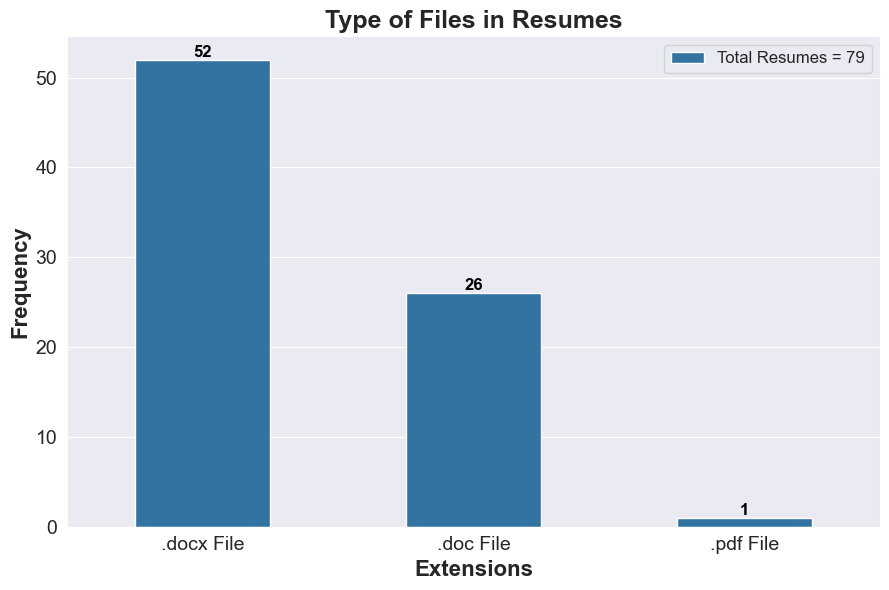

In [204]:
fig, axe = plt.subplots(1,1, figsize=(9,6), dpi=100)
ax = sns.barplot(x=['.docx File','.doc File','.pdf File'], y= [len(docx_file),len(doc_file),len(pdf_file)], width=0.5,
                 ax = axe, label= 'Total Resumes = {}'.format(len(docx_file)+len(doc_file)+len(pdf_file)))

axe.set_xlabel('Extensions', size=16,fontweight = 'bold')
axe.set_ylabel('Frequency', size=16,fontweight = 'bold')
plt.legend(loc='best', fontsize= 'large')
plt.title('Type of Files in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)
    
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\File_Type_Bar', dpi = 500)

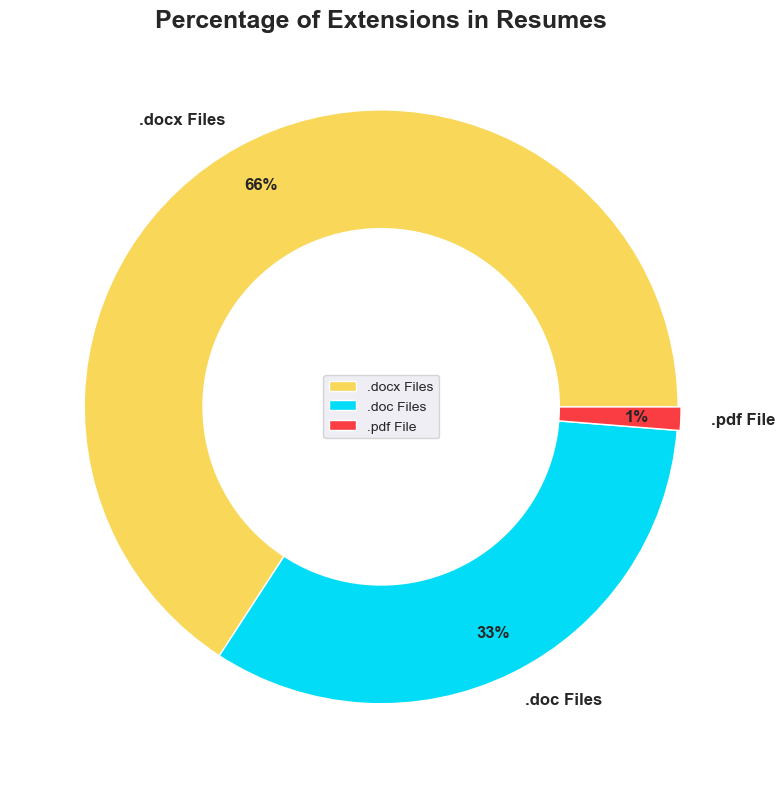

In [205]:
fig = plt.figure(figsize=(8,8), dpi = 100)

sizes = [len(docx_file),len(doc_file),len(pdf_file)]
labels = ['.docx Files','.doc Files','.pdf File']
colors = ['#F9D759', '#03DCF6', '#F93D43']
explode = (0.00, 0.00, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance= 0.85, 
        explode= explode, startangle= 0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='w')
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Extensions in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc= "center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG\Per_File_Pai', dpi = 500)

In [206]:
file_path = r"C:\Users\adity\Resume_Classification\Resumes"
file_name = []
profile   = []

for folder in os.listdir(file_path):
    folder_path = os.path.join(file_path, folder)   # FIXED
    
    # Make sure it's a folder
    if not os.path.isdir(folder_path):
        continue

    for file in os.listdir(folder_path):
        if file.endswith(('.doc', '.docx', '.pdf')):
            profile.append(folder)
            file_name.append(file)


In [207]:
resume_data = pd.DataFrame()
resume_data['Profile'] = profile
resume_data['Resumes'] = file_name
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [209]:
resume_data["Profile"].value_counts()

Profile
Reactjs Developers    24
workday resumes       21
Peoplesoft resumes    20
SQL Developer         14
Name: count, dtype: int64

In [210]:
resume_data.Profile.value_counts().index

Index(['Reactjs Developers', 'workday resumes', 'Peoplesoft resumes',
       'SQL Developer'],
      dtype='object', name='Profile')

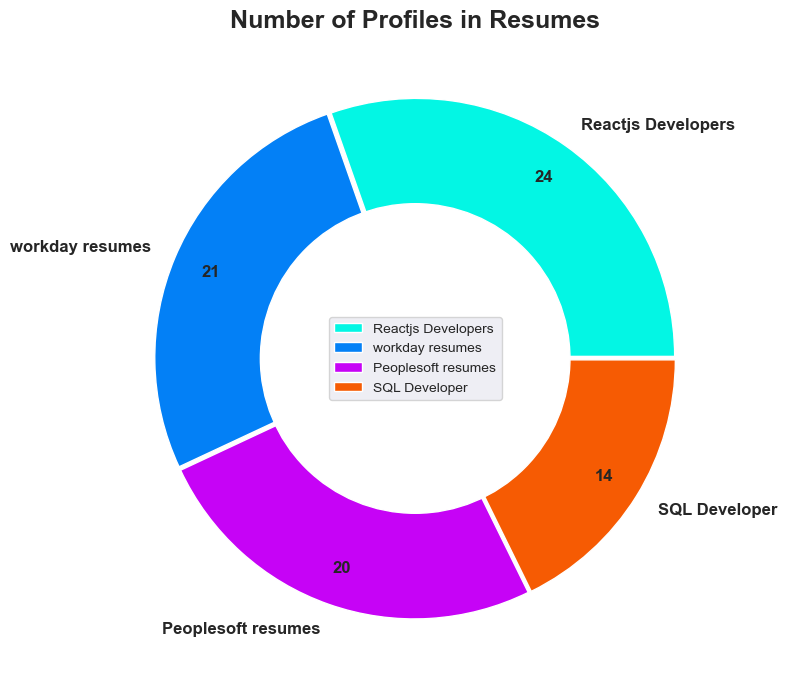

In [211]:
fig = plt.figure(figsize=(8,8))

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#03F6E4', '#0380F6', '#C603F6', '#F65B03'] #, '#4dc0b5', '#03F6E4', '#0380F6', '#C603F6', '#E8C110'
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= lambda x:'{:.0f}'.format(x*sizes.sum()/100),
        pctdistance= 0.85, explode= explode, startangle=0, textprops= {'size':'large', 'fontweight':'bold'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Number of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/No_Resume_Pai', dpi = 500)

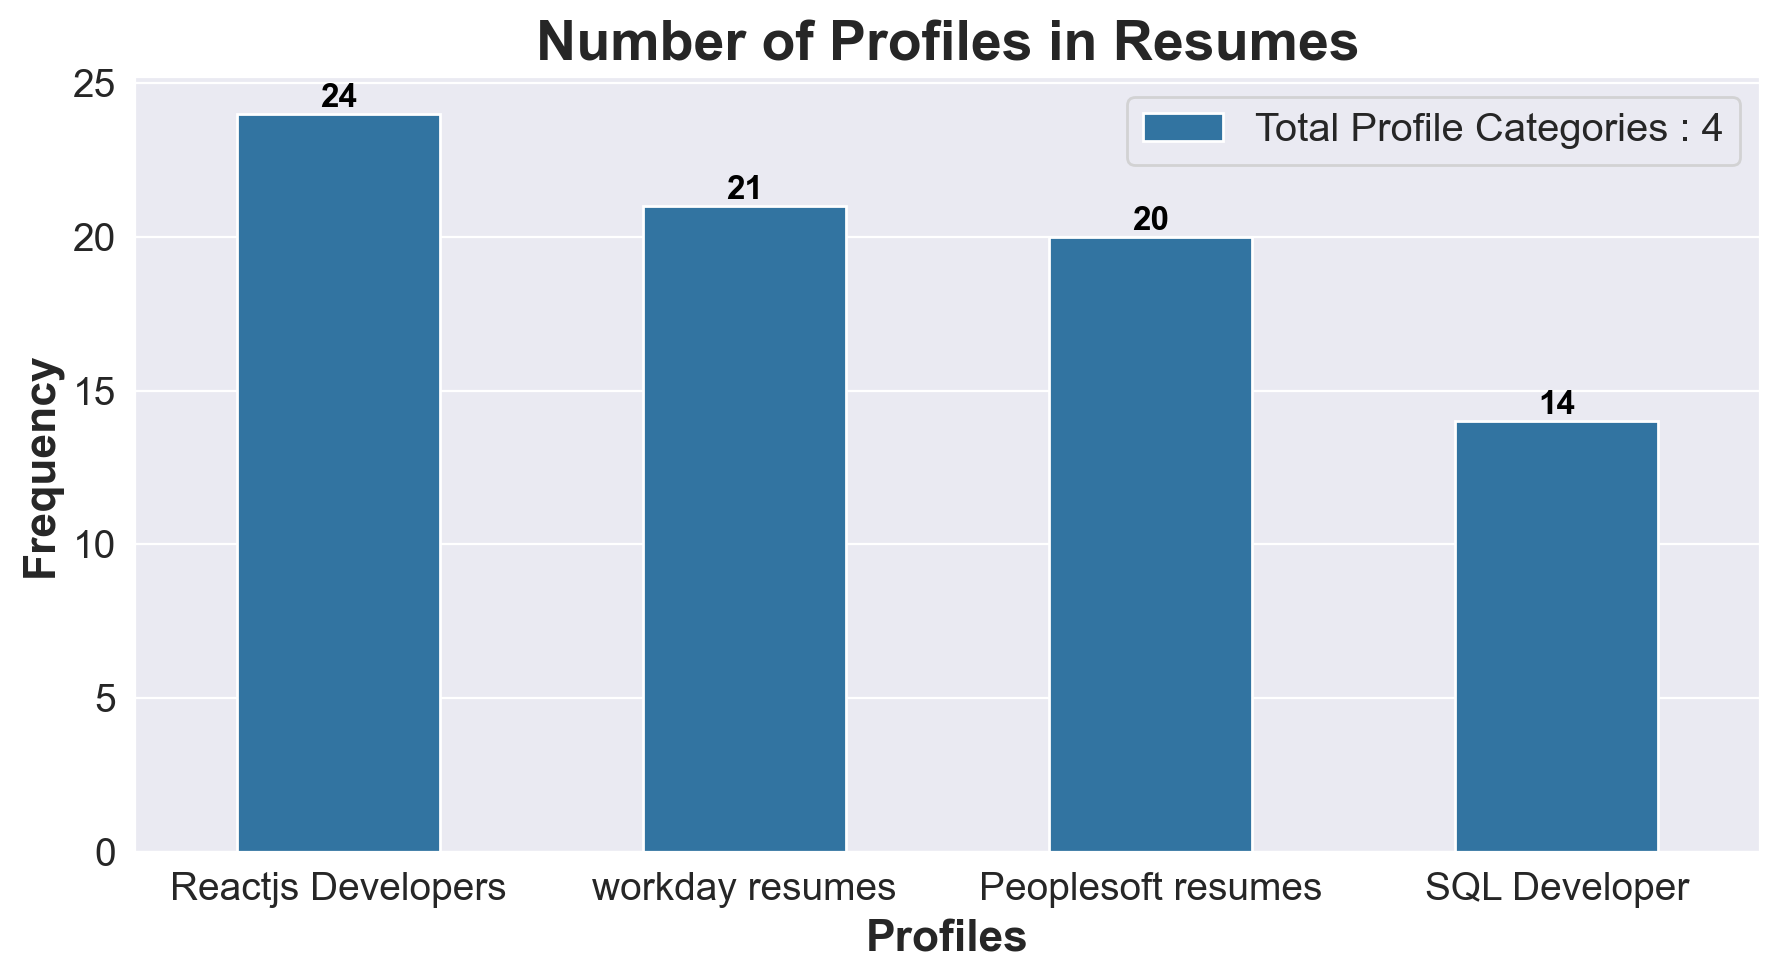

In [217]:
count_df = resume_data['Profile'].value_counts().reset_index()
count_df.columns = ['Profile', 'Count']

# 2. Plot the bar chart
fig, axe = plt.subplots(1,1, figsize=(9,5), dpi=200)

ax = sns.barplot(
    data=count_df,
    x='Profile',
    y='Count',
    ax=axe,
    width=0.5,
    label=f"Total Profile Categories : {count_df['Profile'].nunique()}"
)

# 3. Labels & formatting
axe.set_xlabel('Profiles', size=16, fontweight='bold')
axe.set_ylabel('Frequency', size=16, fontweight='bold')
plt.xticks(rotation=0)
plt.title("Number of Profiles in Resumes", fontsize=20, fontweight='bold')
plt.legend(loc='best', fontsize='x-large')

# 4. Add values on bars
for container in ax.containers:
    ax.bar_label(container, color='black', fontsize=12, fontweight='bold')

fig.tight_layout()
plt.show()

# 5. Save figure
fig.savefig('IMG/No_Resume_Bar.png', dpi=500)


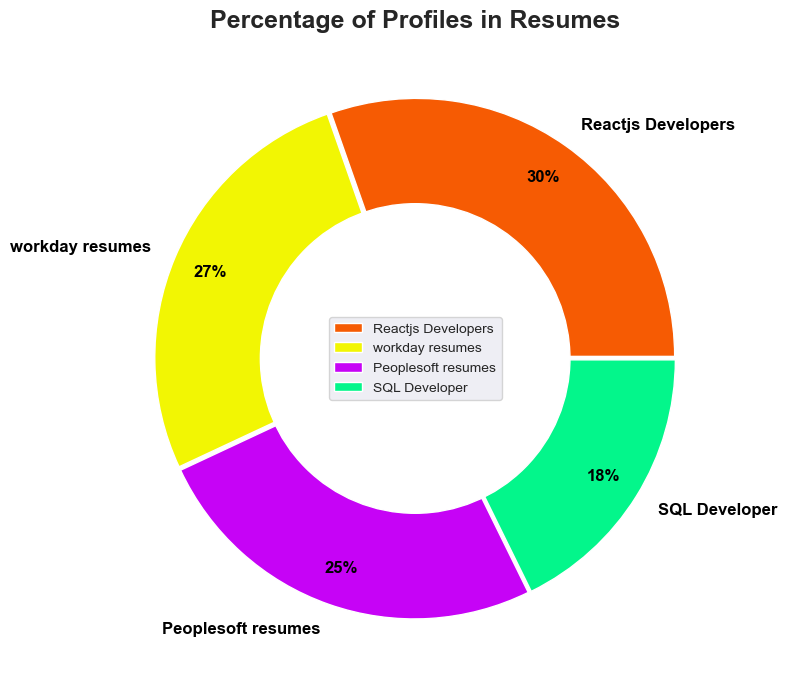

In [218]:
fig = plt.figure(figsize=(8,8),dpi=100) 

sizes = resume_data.Profile.value_counts()
labels = resume_data.Profile.value_counts().index
colors = ['#F65B03', '#F2F603', '#C603F6', '#03F68B']
explode = (0.01, 0.01, 0.01, 0.01)

plt.pie(sizes, colors= colors, labels= labels, autopct= '%1.0f%%', pctdistance=0.85, explode= explode, 
        startangle= 0, textprops= {'size':'large', 'fontweight':'bold', 'color':'black'})

centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Profiles in Resumes', fontsize= 18, fontweight= 'bold')
plt.legend(labels, loc="center")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Per_Cat_Pai', dpi = 500)

In [220]:
def extract_text_from_docx(docx_path):
    return docx2txt.process(docx_path)

docx_path = r"C:\Users\adity\Resume_Classification\Resumes\Reactjs Developers\React Developer_Haripriya.docx"

print(extract_text_from_docx(docx_path))

HARIPRIYA BATTINA 

Experience as UI Developer in Reactjs, JavaScript. 

Phone: +91 9908576950 

Gmail: haripriyabattini@gmai.com 

Location: Visakhapatnam 

JOB OBJECTIVE ● Looking for a challenging role to put my experience in various aspects of technology with an objective to be a leading source of information and guidance concerning th

technological requirements. 

● Want to be a part of a reputed organization that allows me to effectively use my 

technical skills in the real world for overall growth of organization and my 

professional career. 

WORK EXPERIENCE EDUCATION 

1. Associate UI Developr 

Company: Blue Yonder, Hyderabad. 

● Work Done On “COPERNICUS” Project. 

● The Main Moto of this project is, it is GTM (Go To Market) Portal which is specially designed for demo teams to shower case Blue Yonder Products and Features for Customers and Partners 

● Technologies: HTML, CSS, React JS. 

● IDE: VS Code. 

● Methodologies: Agile. 

JOB RESPONSIBILITIES: 

● Involved Desi

In [222]:
resume_data

,Profile,Resumes
0,Peoplesoft resumes,Peoplesoft Admin_AnubhavSingh.docx
1,Peoplesoft resumes,Peoplesoft Admin_G Ananda Rayudu.doc
2,Peoplesoft resumes,Peoplesoft Admin_Gangareddy.doc
3,Peoplesoft resumes,Peoplesoft Admin_Murali.docx
4,Peoplesoft resumes,Peoplesoft Admin_Priyanka Ramadoss.doc
...,...,...
74,workday resumes,Sri Krishna S_Hexaware.doc
75,workday resumes,Srikanth-Hexaware.docx
76,workday resumes,SSKumar_Hexaware.docx
77,workday resumes,Venkateswarlu B_Hexaware.doc


In [226]:
resume_data = pd.read_csv(r"C:\Users\adity\Resume_Classification\Resumes\Cleaned_Resumes.csv")
resume_data

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh work globally competitive ...
1,PeopleSoft,ananda rayudu profile summary years experience...
2,PeopleSoft,peoplesoft database administrator gangareddy p...
3,PeopleSoft,classification internal murali experience summ...
4,PeopleSoft,priyanka ramadoss mountpleasant coonoor nilgir...
...,...,...
74,Workday,workday integration consultant name sri krishn...
75,Workday,seeking suitable positions workday hcm techno ...
76,Workday,workday hcm fcm name role kumar workday consul...
77,Workday,venkateswarlu workday consultant professional ...


In [228]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(1)[:20]

[WordList(['ananda']),
 WordList(['rayudu']),
 WordList(['profile']),
 WordList(['summary']),
 WordList(['years']),
 WordList(['experience']),
 WordList(['implementing']),
 WordList(['upgrading']),
 WordList(['supporting']),
 WordList(['peoplesoft']),
 WordList(['database']),
 WordList(['administration']),
 WordList(['including']),
 WordList(['human']),
 WordList(['capital']),
 WordList(['management']),
 WordList(['hcm']),
 WordList(['financials']),
 WordList(['campus']),
 WordList(['solutions'])]

In [230]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(2)[:20]

[WordList(['ananda', 'rayudu']),
 WordList(['rayudu', 'profile']),
 WordList(['profile', 'summary']),
 WordList(['summary', 'years']),
 WordList(['years', 'experience']),
 WordList(['experience', 'implementing']),
 WordList(['implementing', 'upgrading']),
 WordList(['upgrading', 'supporting']),
 WordList(['supporting', 'peoplesoft']),
 WordList(['peoplesoft', 'database']),
 WordList(['database', 'administration']),
 WordList(['administration', 'including']),
 WordList(['including', 'human']),
 WordList(['human', 'capital']),
 WordList(['capital', 'management']),
 WordList(['management', 'hcm']),
 WordList(['hcm', 'financials']),
 WordList(['financials', 'campus']),
 WordList(['campus', 'solutions']),
 WordList(['solutions', 'portal'])]

In [232]:
TextBlob(resume_data['Resume_Details'][1]).ngrams(3)[:20]

[WordList(['ananda', 'rayudu', 'profile']),
 WordList(['rayudu', 'profile', 'summary']),
 WordList(['profile', 'summary', 'years']),
 WordList(['summary', 'years', 'experience']),
 WordList(['years', 'experience', 'implementing']),
 WordList(['experience', 'implementing', 'upgrading']),
 WordList(['implementing', 'upgrading', 'supporting']),
 WordList(['upgrading', 'supporting', 'peoplesoft']),
 WordList(['supporting', 'peoplesoft', 'database']),
 WordList(['peoplesoft', 'database', 'administration']),
 WordList(['database', 'administration', 'including']),
 WordList(['administration', 'including', 'human']),
 WordList(['including', 'human', 'capital']),
 WordList(['human', 'capital', 'management']),
 WordList(['capital', 'management', 'hcm']),
 WordList(['management', 'hcm', 'financials']),
 WordList(['hcm', 'financials', 'campus']),
 WordList(['financials', 'campus', 'solutions']),
 WordList(['campus', 'solutions', 'portal']),
 WordList(['solutions', 'portal', 'ihub'])]

In [234]:
resume_data['Resume_Details']

0     anubhav kumar singh work globally competitive ...
1     ananda rayudu profile summary years experience...
2     peoplesoft database administrator gangareddy p...
3     classification internal murali experience summ...
4     priyanka ramadoss mountpleasant coonoor nilgir...
                            ...                        
74    workday integration consultant name sri krishn...
75    seeking suitable positions workday hcm techno ...
76    workday hcm fcm name role kumar workday consul...
77    venkateswarlu workday consultant professional ...
78    vinay kumar workday functional consultant expe...
Name: Resume_Details, Length: 79, dtype: object

In [236]:
countvec = CountVectorizer(stop_words=stopwords.words('english'), ngram_range=(1,2))
ngrams = countvec.fit_transform(resume_data['Resume_Details']) # matrix of ngrams
count_values = ngrams.toarray().sum(axis=0) # count frequency of ngrams

vocab = countvec.vocabulary_ # list of ngrams
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k, i in vocab.items()],
                               reverse=True)).rename(columns={0: 'Frequency', 1:'Unigram_Bigram'})

In [238]:
df_ngram.head(20)

,Frequency,Unigram_Bigram
0,582,experience
1,451,peoplesoft
2,427,workday
3,415,application
4,394,using
5,358,server
6,331,data
7,326,reports
8,323,project
9,280,sql


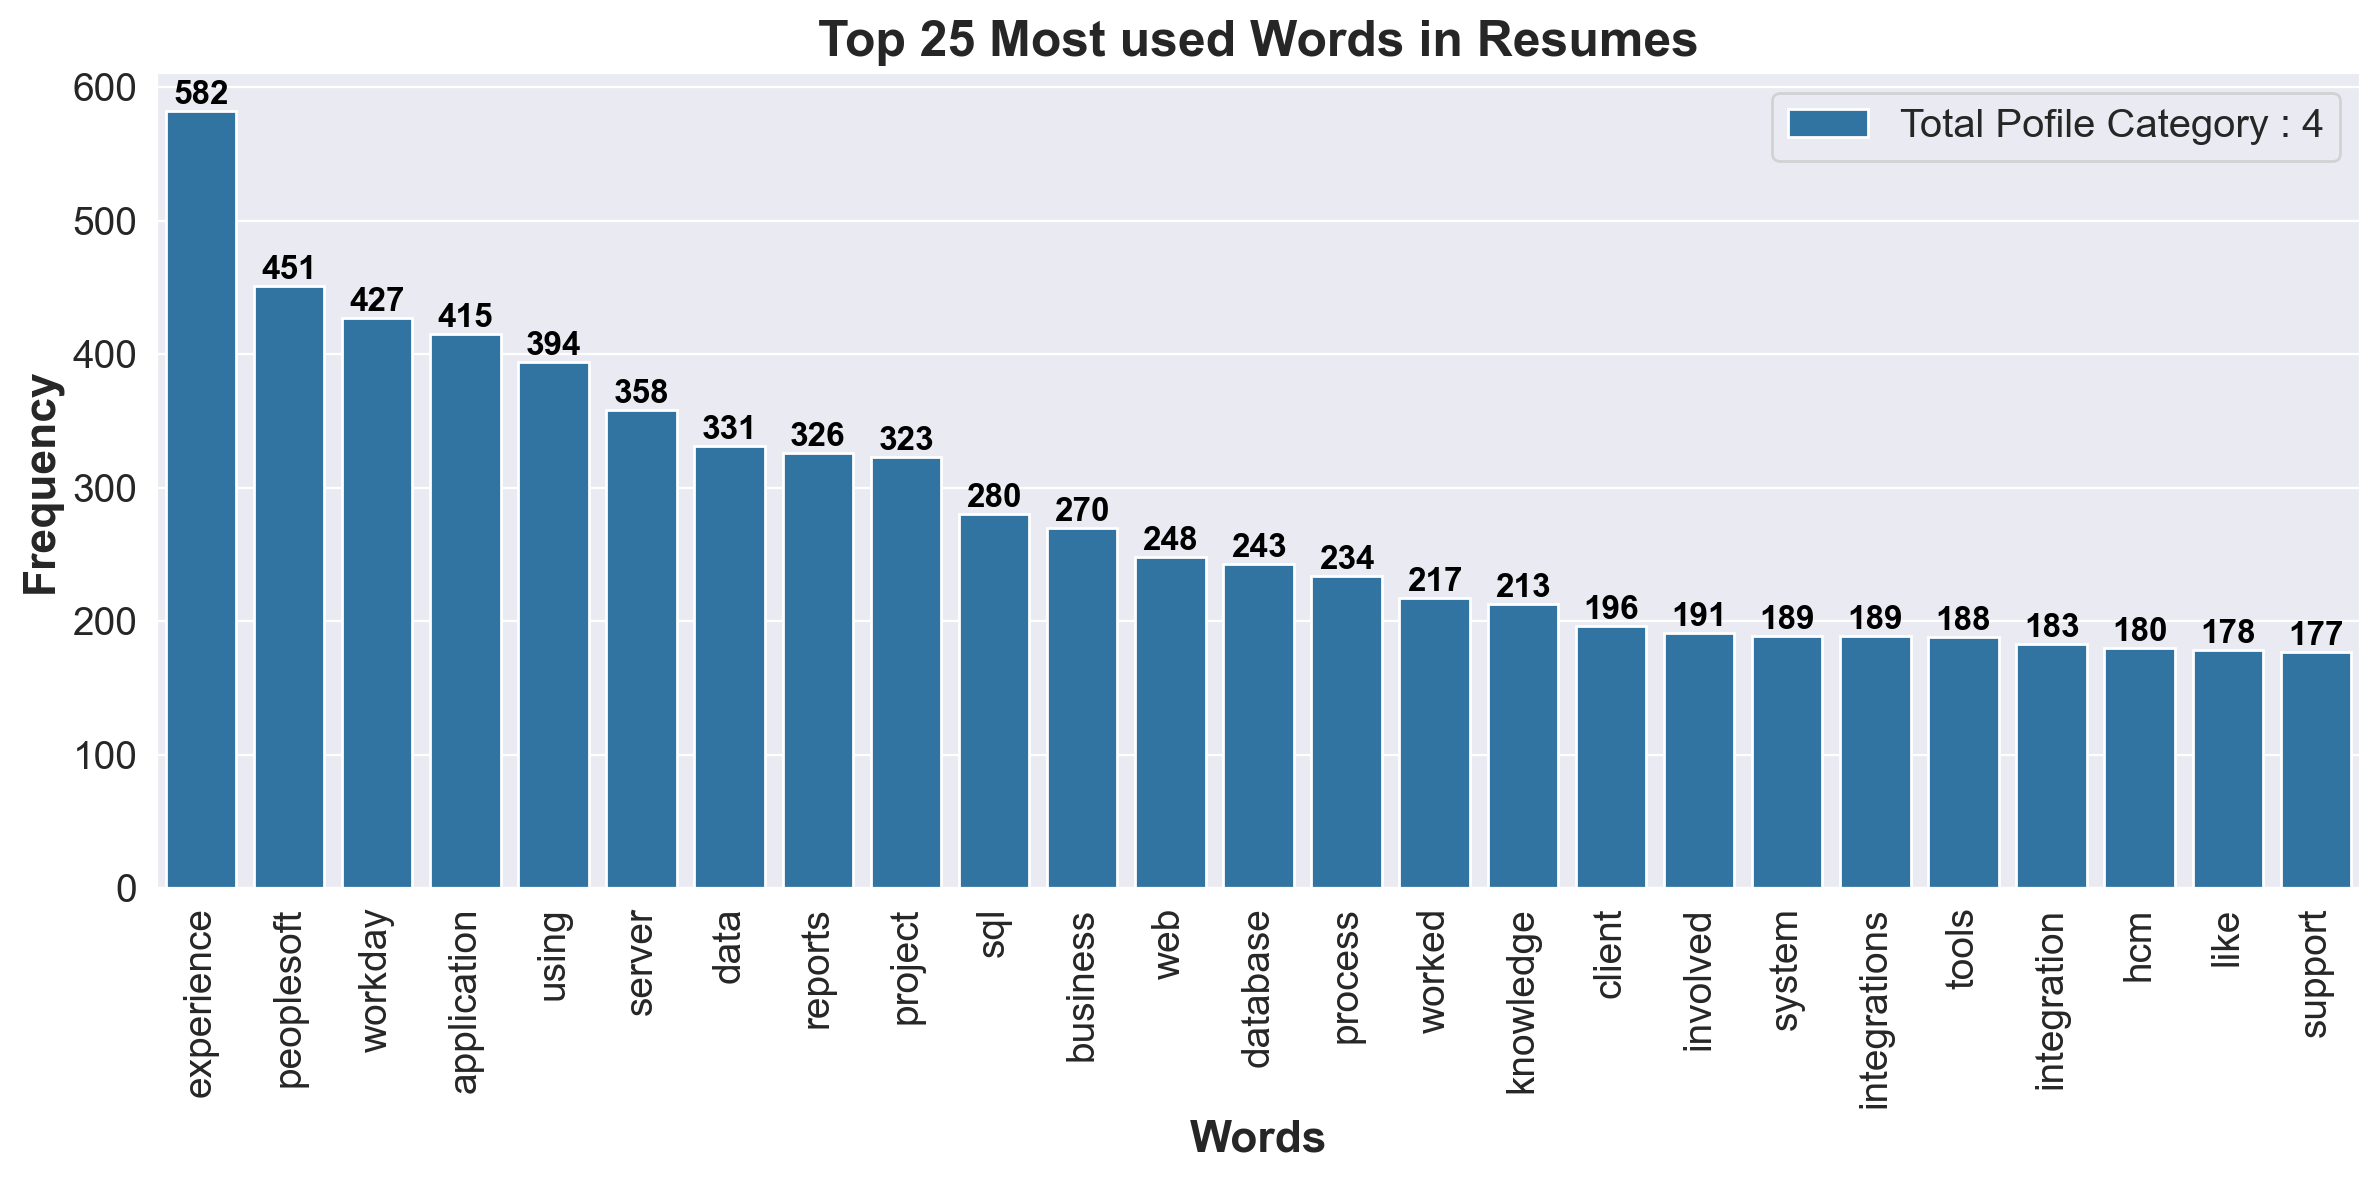

In [240]:
fig, axe = plt.subplots(1,1, figsize=(12,6), dpi=200)
ax = sns.barplot(x=df_ngram['Unigram_Bigram'].head(25), y=df_ngram.Frequency.head(25), data=resume_data, ax = axe,
            label='Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Words', size=16,fontweight= 'bold')
axe.set_ylabel('Frequency', size=16, fontweight= 'bold')
plt.xticks(rotation = 90)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Words in Resumes', fontsize= 18, fontweight= 'bold')

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize= 12)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()
fig.savefig('IMG/Top_Words_Bar', dpi = 500)

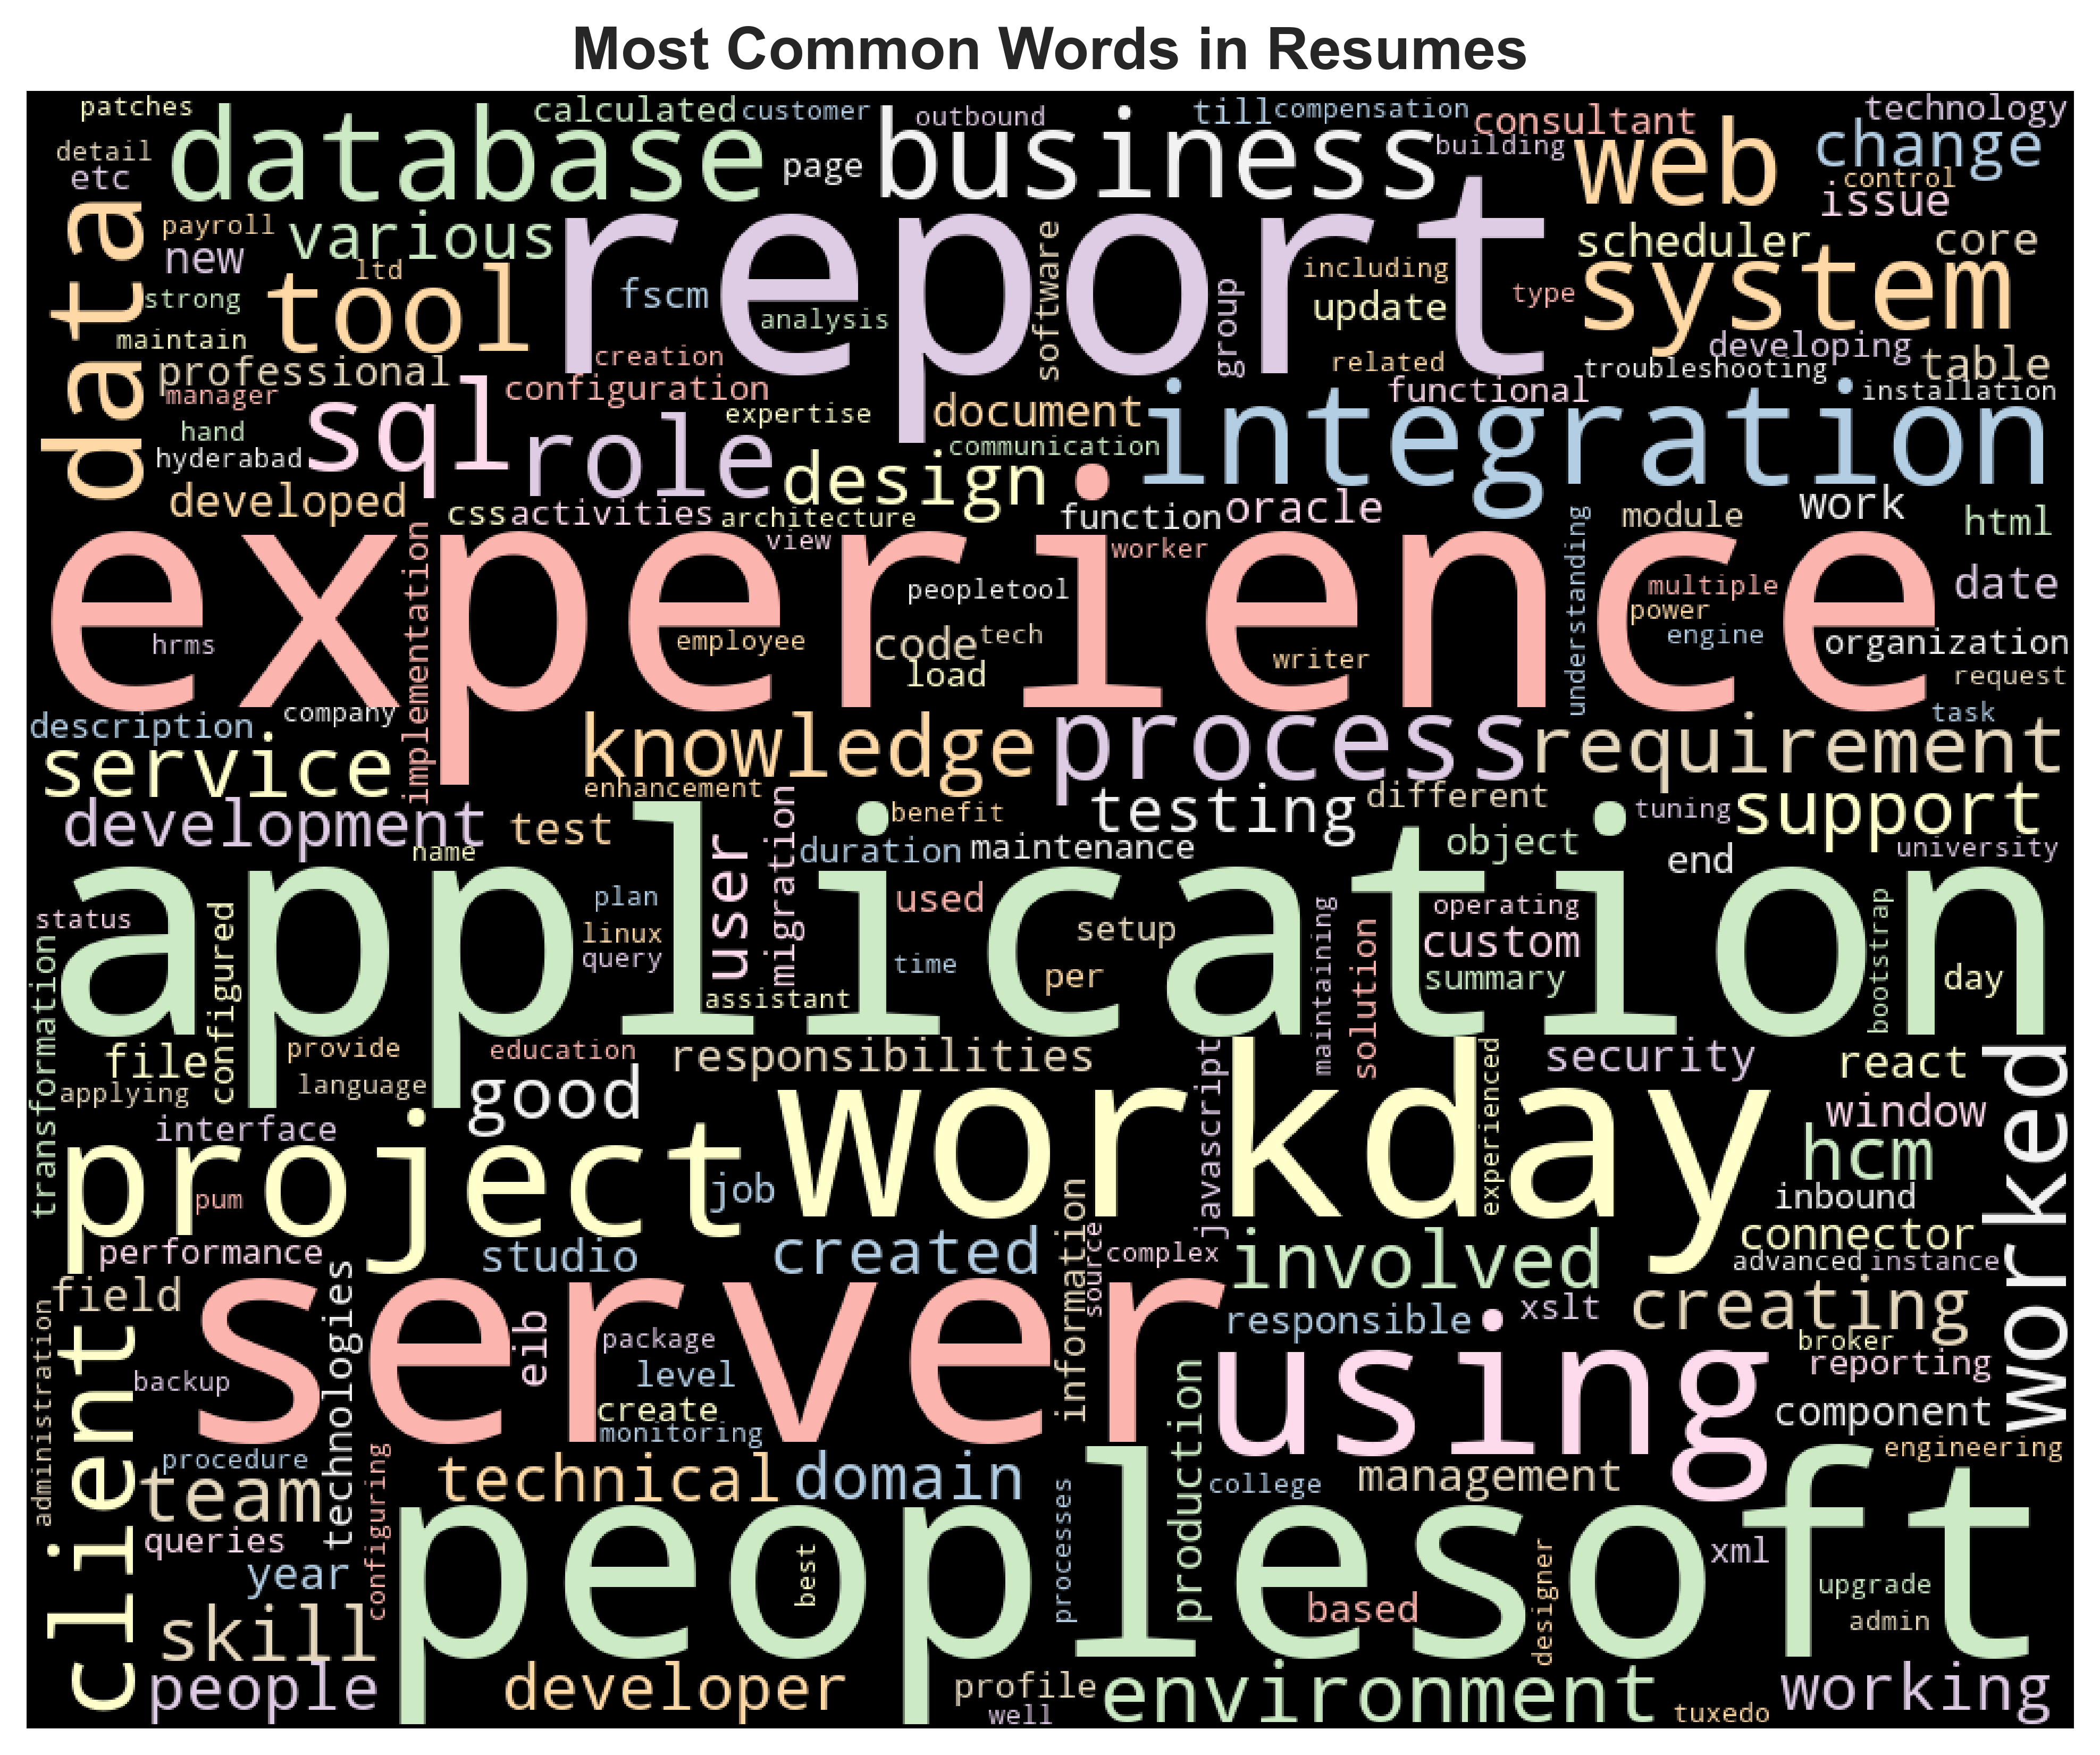

In [242]:
text = " ".join(cat for cat in resume_data.Resume_Details) # Creating the text variable

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,8), dpi=500) # Display the generated Word Cloud
plt.title('Most Common Words in Resumes', fontsize= 16, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('IMG/Word_Clowds.png')
plt.show()